# Lines, Scatters and Bars

## Instructions

In this lesson, you worked with line charts, scatterplots, and bar charts to show interesting facts about this dataset. In this assignment, dig deeper into the dataset to discover a fact about a given type of bird. For example, create a notebook visualizing all the interesting data you can uncover about Snow Geese. Use the three plots mentioned above to tell a story in your notebook.

## Rubric

Exemplary | Adequate | Needs Improvement
--- | --- | -- |
A notebook is presented with good annotations, solid storytelling, and attractive graphs | The notebook is missing one of these elements | The notebook is missing two of these elements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
birds = pd.read_csv('../../data/birds.csv')
birds.sample(5)

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
48,Spruce grouse,Falcipennis canadensis,Pheasants/Grouse/Allies,Galliformes,Phasianidae,Falcipennis,LC,38.0,43.0,450.0,650.0,54.5,57.5
296,Brown creeper,Certhia americana,Treecreepers,Passeriformes,Certhiidae,Certhia,LC,12.0,14.0,5.0,10.0,17.0,20.0
349,Snow bunting,Plectrophenax nivalis,Longspurs/Snow buntings,Passeriformes,Calcariidae,Plextrophenax,LC,15.0,15.0,30.0,40.0,32.0,38.0
75,Eastern whip-poor-will,Antrostomus vociferus,Nightjars/Allies,Caprimulgiformes,Caprimulgidae,Antrostomus,NT,22.0,27.0,42.0,69.0,45.0,50.0
12,Garganey,Spatula querquedula,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Spatula,LC,41.0,41.0,300.0,400.0,58.0,69.0


In [2]:
# fix those 2 or 4 outliers
print(birds.loc[[209]])
print(birds.loc[[247]])
birds['MaxWingspan'][209] = birds['MaxWingspan'][209]/10
birds['MinWingspan'][209] = birds['MinWingspan'][209]/10
birds['MaxWingspan'][247] = birds['MaxWingspan'][247]/10
birds['MinWingspan'][247] = birds['MinWingspan'][247]/10
print(birds.loc[[209]])
print(birds.loc[[247]])

           Name            ScientificName      Category            Order   
209  Bald eagle  Haliaeetus leucocephalus  Hawks/Eagles  Accipitriformes  \

           Family       Genus ConservationStatus  MinLength  MaxLength   
209  Accipitridae  Haliaeetus                 LC       70.0      102.0  \

     MinBodyMass  MaxBodyMass  MinWingspan  MaxWingspan  
209       3000.0       6300.0       1800.0       2300.0  
               Name   ScientificName            Category         Order   
247  Prairie falcon  Falco mexicanus  Falcons /Caracaras  Falconformes  \

         Family  Genus ConservationStatus  MinLength  MaxLength  MinBodyMass   
247  Falconidae  Falco                 LC       37.0       45.0        500.0  \

     MaxBodyMass  MinWingspan  MaxWingspan  
247        970.0       1100.0       1100.0  
           Name            ScientificName      Category            Order   
209  Bald eagle  Haliaeetus leucocephalus  Hawks/Eagles  Accipitriformes  \

           Family       Genus

/tmp/ipykernel_280/4070454546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds['MaxWingspan'][209] = birds['MaxWingspan'][209]/10
/tmp/ipykernel_280/4070454546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds['MinWingspan'][209] = birds['MinWingspan'][209]/10
/tmp/ipykernel_280/4070454546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds['MaxWingspan'][247] = birds['MaxWingspan'][247]/10
/tmp/ipykernel_280/407

In [3]:
# okay let's learn about the Vesper sparrow, row 365
birds.loc[[365]]

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
365,Vesper sparrow,Pooecetes gramineus,New World sparrows,Passeriformes,Passerellidae,Pooecetes,LC,13.0,16.0,20.0,28.0,24.0,24.0


## Quantitative Values
first, let's compare the it's length, body mass, and wingspan with the mean and median of those values for all the birds.<br>

I will find said value and place them in some arrays (series? lists?).

In [4]:
atts = birds.columns.tolist()
del atts[0:7]
atts

['MinLength',
 'MaxLength',
 'MinBodyMass',
 'MaxBodyMass',
 'MinWingspan',
 'MaxWingspan']

#### Figure out how to find mean and median

In [5]:
means = []
for item in atts:
    means.append(birds.loc[:, item].mean())
means

[28.53668171557562,
 35.44198645598194,
 327.9382618510158,
 667.0097516930023,
 52.66625282167043,
 60.61704288939052]

In [6]:
medians = []
for item in atts:
    medians.append(birds.loc[:, item].median())
medians

[20.5, 25.0, 55.0, 89.0, 38.0, 42.0]

might as well just make a list for these Vesper sparrow attributes too.

In [7]:
VesSpar = []
for item in atts:
    VesSpar.append(birds.loc[365, item])
VesSpar

[13.0, 16.0, 20.0, 28.0, 24.0, 24.0]

#### Combine all that information into a dict

In [8]:
attvals = dict({'mean': means, 'vs': VesSpar, 'median': medians})
attvals

{'mean': [28.53668171557562,
  35.44198645598194,
  327.9382618510158,
  667.0097516930023,
  52.66625282167043,
  60.61704288939052],
 'vs': [13.0, 16.0, 20.0, 28.0, 24.0, 24.0],
 'median': [20.5, 25.0, 55.0, 89.0, 38.0, 42.0]}

#### plot!

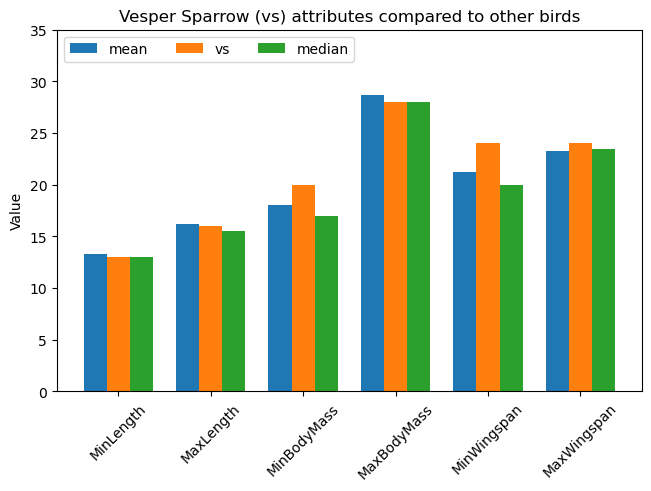

In [44]:
# all from here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(atts))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in attvals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3) #labels make it too cluttered
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Vesper Sparrow (vs) attributes compared to other birds')
ax.set_xticks(x + width, atts)
plt.xticks(rotation=45)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 35)

plt.show()

### Cool! How about just its category?
so the birds in the ```New World sparrows```.

In [10]:
# Since we're creating a new df anyways, let's delete the columns we are not using
birds_qn = birds.drop(birds.columns[[1, 3, 4, 5, 6]], axis=1)
birds_qn.sample(5)

,Name,Category,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
94,Whooping crane,Cranes,124.0,160.0,4500.0,8500.0,200.0,230.0
67,White-winged dove,Pigeons/Doves,29.0,29.0,150.0,150.0,48.0,58.0
284,Tree swallow,Swallows,12.0,14.0,17.0,25.5,30.0,35.0
12,Garganey,Ducks/Geese/Waterfowl,41.0,41.0,300.0,400.0,58.0,69.0
90,Purple gallinule,Rails/Gallinules/Coots,26.0,37.0,141.0,305.0,50.0,61.0


In [11]:
# so let's create a new dataframe with only birds in New World sparrows, from here
#https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-and-then-filling-it
# we're creating a list first
nwspar_list = []
for index, row in birds_qn.iterrows():
    if (row['Category'] == 'New World sparrows'):
        nwspar_list.append(birds_qn.loc[[index]].values.flatten().tolist())
nwspar_list[:5]

[['Grasshopper sparrow',
  'New World sparrows',
  10.0,
  14.0,
  13.8,
  28.4,
  17.5,
  17.5],
 ['Black-throated sparrow',
  'New World sparrows',
  12.0,
  14.0,
  11.0,
  15.0,
  19.5,
  19.5],
 ['Lark sparrow', 'New World sparrows', 15.0, 17.0, 24.0, 33.0, 28.0, 28.0],
 ['Lark bunting', 'New World sparrows', 14.0, 18.0, 35.3, 41.3, 25.0, 28.0],
 ['Chipping sparrow',
  'New World sparrows',
  12.0,
  15.0,
  11.0,
  16.0,
  21.0,
  21.0]]

In [12]:
# check if I did it right
print(birds['Category'].value_counts())
print(birds_qn['Category'].value_counts())
len(nwspar_list)

Category
Ducks/Geese/Waterfowl              45
New World warblers                 41
Sandpipers/Allies                  34
Gulls/Terns/Skimmers               28
New World sparrows                 26
Tyrant flycatchers                 19
Hawks/Eagles                       15
Troupials/Allies                   14
Finches/Euphonias/Allies           13
Woodpeckers                        12
Thrushes/Allies                    11
Owls                               11
Herons/Egrets/Bitterns             11
Cardinals/Allies                   11
Pheasants/Grouse/Allies             9
Pigeons/Doves                       8
Rails/Gallinules/Coots              8
Hummingbirds                        7
Plovers/Lapwings                    7
Wrens                               7
Swallows                            7
Vireos/Shrike-babblers/Erpornis     7
Grebes                              6
Crows/Jays/Magpies                  6
Falcons /Caracaras                  6
Longspurs/Snow buntings             5
Moc

26

In [13]:
# All 26! Okay let's create the df
nwspar = pd.DataFrame(nwspar_list)
nwspar.columns = birds_qn.columns #rename columns (they are just basic numbers rn)
nwspar.head()

,Name,Category,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Grasshopper sparrow,New World sparrows,10.0,14.0,13.8,28.4,17.5,17.5
1,Black-throated sparrow,New World sparrows,12.0,14.0,11.0,15.0,19.5,19.5
2,Lark sparrow,New World sparrows,15.0,17.0,24.0,33.0,28.0,28.0
3,Lark bunting,New World sparrows,14.0,18.0,35.3,41.3,25.0,28.0
4,Chipping sparrow,New World sparrows,12.0,15.0,11.0,16.0,21.0,21.0


#### mean, median, and other info
obv with only this category!

In [14]:
# groups
atts = nwspar.columns.tolist()
del atts[0:2]
atts
# I am aware there is no change of this from last time, but let me just practice

['MinLength',
 'MaxLength',
 'MinBodyMass',
 'MaxBodyMass',
 'MinWingspan',
 'MaxWingspan']

In [15]:
# mean
means = []
for item in atts:
    means.append(nwspar.loc[:, item].mean())
means

[13.28076923076923,
 16.21153846153846,
 18.057692307692307,
 28.676923076923078,
 21.190384615384616,
 23.236538461538462]

In [16]:
# median
medians = []
for item in atts:
    medians.append(nwspar.loc[:, item].median())
medians

[13.0, 15.5, 17.0, 28.0, 20.0, 23.5]

Not gonna find vesper sparrow attributes again because that really is the exact same code, and any changes will just be big unecessary extra work. 

#### Combine all information into a dict

In [20]:
attvals = dict({'mean': means, 'vs': VesSpar, 'median': medians})
attvals

{'mean': [13.28076923076923,
  16.21153846153846,
  18.057692307692307,
  28.676923076923078,
  21.190384615384616,
  23.236538461538462],
 'vs': [13.0, 16.0, 20.0, 28.0, 24.0, 24.0],
 'median': [13.0, 15.5, 17.0, 28.0, 20.0, 23.5]}

#### plot!

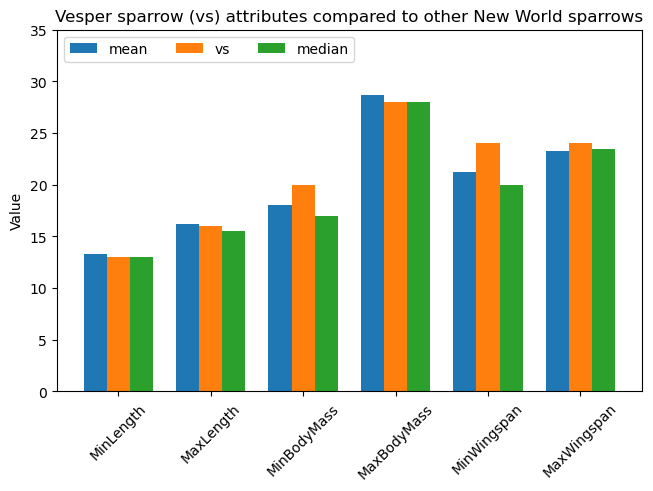

In [34]:
# all from here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(atts))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in attvals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3) # removed labels bc too cluttered
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Vesper sparrow (vs) attributes compared to other New World sparrows')
ax.set_xticks(x + width, atts)
plt.xticks(rotation=45)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 35)

plt.show()

conclusions: It seems their length is pretty average, though a bit on the smaller side, while body mass is also kinda average, but a bit on the larger size. Wingspans is the only area with conclusive results, with it being larger than the category's on average. 

## Qualitative Values

In [35]:
# let's take a look at the dataframe again
birds.sample(5)

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
379,Eastern meadowlark,Sturnella magna,Troupials/Allies,Passeriformes,Icteridae,Sturnella,NT,19.0,28.0,76.0,150.0,35.0,40.0
421,Pine warbler,Setophaga pinus,New World warblers,Passeriformes,Parulidae,Setophaga,LC,12.7,14.6,12.0,12.0,22.2,22.2
115,Curlew sandpiper,Calidris ferruginea,Sandpipers/Allies,Charadriiformes,Scolopacidae,Calidris,NT,18.0,23.0,44.0,117.0,38.0,41.0
239,Hairy woodpecker,Dryobates villosus,Woodpeckers,Piciformes,Picidae,Leuconotopicus,LC,18.0,26.0,40.0,95.0,33.0,43.0
301,Marsh wren,Cistothorus palustris,Wrens,Passeriformes,Troglodytidae,Cistothorus,LC,10.0,14.0,9.0,14.0,15.0,15.0


In [36]:
# and the vesper sparrow, because we are still focused on that
birds.loc[[365]]

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
365,Vesper sparrow,Pooecetes gramineus,New World sparrows,Passeriformes,Passerellidae,Pooecetes,LC,13.0,16.0,20.0,28.0,24.0,24.0


Okay, so there is a vague idea of doing some kind of nomenclature thing where there can be a flow chart from order of family down to species (fun time data cleaning scientific name!) or genus, so we can see how closely "related" the Vesper sparrow is to other birds. 

In [37]:
birds['Order'].value_counts()

Order
Passeriformes        195
Charadriiformes       78
Anseriformes          45
Pelecaniformes        17
Accipitriformes       16
Piciformes            12
Strigiformes          12
Gruiformes            10
Galliformes           10
Apodiformes            9
Columbiformes          8
Podicipediformes       6
Falconformes           6
Caprimulgiformes       4
Gaviiformes            4
Suliformes             3
Cuculiformes           3
Cathartiformes         2
Coraciiformes          1
Ciconiiformes          1
Procellariiformes      1
Name: count, dtype: int64

Okay 195 of order ```Passeriformes``` isn't bad, create a new dataframe to hold just that Order to see if I can go all the way to genus or stop at family (195 is still a lot). Also because if we're only working with ```Passeriformes```, then why not.

In [52]:
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
Passeriformes = birds[birds.Order == 'Passeriformes']

# delete unecessary columns
Passeriformes = Passeriformes.drop(Passeriformes.columns[[2, 6, 7, 8, 9, 10, 11, 12]], axis=1)

Passeriformes.sample(5)

,Name,ScientificName,Order,Family,Genus
355,Clay-colored sparrow,Spizella pallida,Passeriformes,Passerellidae,Spizella
393,Louisiana waterthrush,Parkesia motacilla,Passeriformes,Parulidae,Parkesia
288,Barn swallow,Hirundo rustica,Passeriformes,Hirundinidae,Hirundo
438,Blue grosbeak,Passerina caerulea,Passeriformes,Cardinalidae,Passerina
334,Pine grosbeak,Pinicola enucleator,Passeriformes,Fringillidae,Carduelinae


In [47]:
Passeriformes['Family'].value_counts()

Family
Parulidae        41
Passerellidae    26
Tyrannidae       19
Icteridae        15
Fringillidae     13
Turdidae         11
Cardinalidae     11
Troglodytidae     7
Vireonidae        7
Hirundinidae      7
Corvidae          6
Calcariidae       5
Mimidae           5
Sittidae          3
Paridae           3
Regulidae         2
Laniidae          2
Bombycillidae     2
Passeridae        2
Motacillidae      2
Alaudidae         1
Sturnidae         1
Certhiidae        1
Cinclidae         1
Polioptilidae     1
Muscicapidae      1
Name: count, dtype: int64

find Vesper sparrow

In [54]:
Passeriformes.loc[Passeriformes['Name'].str.contains('Vesper')]

,Name,ScientificName,Order,Family,Genus
365,Vesper sparrow,Pooecetes gramineus,Passeriformes,Passerellidae,Pooecetes


I will try making a Sankey diagram with just ```Order``` to ```Family```. It has to be with plotly then.
Remember to install it first:
```bash
pip install plotly==5.20.0
```

In [39]:
import plotly.express as px

test with the sample code to see if I can do the html trick

In [69]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.write_html('egSankey.html', auto_open=True)

yes! it worked. Okay, on to arranging the data

In [70]:
# LABEL

# Order
labels = ["Passeriformes"]
labels

# Family
families = Passeriformes['Family'].unique()
families

labels.extend(families)
labels

['Passeriformes',
 'Tyrannidae',
 'Laniidae',
 'Vireonidae',
 'Corvidae',
 'Alaudidae',
 'Hirundinidae',
 'Paridae',
 'Sittidae',
 'Certhiidae',
 'Troglodytidae',
 'Polioptilidae',
 'Cinclidae',
 'Regulidae',
 'Muscicapidae',
 'Turdidae',
 'Mimidae',
 'Sturnidae',
 'Bombycillidae',
 'Passeridae',
 'Motacillidae',
 'Fringillidae',
 'Calcariidae',
 'Passerellidae',
 'Icteridae',
 'Parulidae',
 'Cardinalidae']

In [72]:
# INTERLUDE
# figure out if I can get value_counts to match up with this Family order
Passeriformes['Family'].value_counts(sort=False)
# YESSSSS

Family
Tyrannidae       19
Laniidae          2
Vireonidae        7
Corvidae          6
Alaudidae         1
Hirundinidae      7
Paridae           3
Sittidae          3
Certhiidae        1
Troglodytidae     7
Polioptilidae     1
Cinclidae         1
Regulidae         2
Muscicapidae      1
Turdidae         11
Mimidae           5
Sturnidae         1
Bombycillidae     2
Passeridae        2
Motacillidae      2
Fringillidae     13
Calcariidae       5
Passerellidae    26
Icteridae        15
Parulidae        41
Cardinalidae     11
Name: count, dtype: int64

In [76]:
# SOURCE

# find length of families array to figure out # of families bc that's basically # of links
len(families) # = 26

# all start from Passeriformes, first item in the labels list, so zero index
# https://note.nkmk.me/en/python-list-initialize/
sources = [0] * len(families)
sources

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [80]:
# TARGET

# one each Family
targets = [1]
for i in range (2, 27):
    targets.append(i)
targets

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [83]:
# VALUE

# these are the value_counts, remember to coordinate order!
values = Passeriformes['Family'].value_counts(sort=False).tolist()
values

[19,
 2,
 7,
 6,
 1,
 7,
 3,
 3,
 1,
 7,
 1,
 1,
 2,
 1,
 11,
 5,
 1,
 2,
 2,
 2,
 13,
 5,
 26,
 15,
 41,
 11]

plot!

In [84]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Passeriformes to various Families", font_size=10)
fig.write_html('PasseriformesFamilies.html', auto_open=True)

That wasn't too bad! I think I can add genus to this!<br>

TODO
- add genus
- highlight (with a diff colour) the Vesper Sparrow path